# Datos OCDE

In [ ]:
from typing import Literal
from utils.oecd import get_oecd_data
import matplotlib.pyplot as plt
from pprint import pprint
import pandas as pd
from datawrapper import Datawrapper

dw = Datawrapper()

type ChartType = Literal[
    "d3-bars",
    "d3-bars-split",
    "d3-bars-stacked",
    "d3-bars-bullet",
    "d3-bars-grouped",
    "d3-dot-plot",
    "d3-range-plot",
    "d3-arrow-plot",
    "column-chart",
    "grouped-column-chart",
    "stacked-column-chart",
    "d3-area",
    "d3-lines",
    "multiple-lines",
    "d3-pies",
    "d3-donuts",
    "d3-multiple-pies",
    "d3-multiple-donuts",
    "d3-scatter-plot",
    "election-donut-chart",
    "tables",
    "d3-maps-choropleth",
    "d3-maps-symbols",
    "locator-map",
]

country_map = {
    "CHE": "Suiza",
    "CHL": "Chile",
    "DEU": "Alemania",
    "ESP": "España",
    "OECD_REP": "OCDE",
    "SWE": "Suecia"
}

def update_chart(chart_id: str, data: pd.DataFrame, chart_type: ChartType, title: str, intro: str, source: str):
    metadata = {
        'describe': {
        'intro': intro,
        'source-name': source,
        #   'source-url': 'https://data-explorer.oecd.org/vis?lc=en&tm=pension&pg=0&snb=177&vw=ov&df[ds]=dsDisseminateFinalDMZ&df[id]=DSD_PAG%40DF_PW&df[ag]=OECD.ELS.SPD&df[vs]=1.0&dq=.A.....&pd=2022%2C2022&to[TIME_PERIOD]=true&isAvailabilityDisabled=false',
        'byline': 'Centro Ruth Richardson (Universidad de las Hespérides)'
        },
        'publish': {'blocks': {'logo': {'id': 'hesperides', 'enabled': True}}},
        # 'annotate': {'notes': 'Notas adicionales'},
    }

    dw.update_chart(chart_id, data=data, title=title, chart_type=chart_type, metadata=metadata)

## Gasto en pensiones públicas


### Porcentaje del PIB

OECD. [Public expenditure on old-age and survivors cash benefits in % GDP](https://data-explorer.oecd.org/vis?lc=en&df[ds]=DisseminateFinalDMZ&df[id]=DSD_SOCX_AGG%40DF_PUB_OLD&df[ag]=OECD.ELS.SPD&df[vs]=1.0&dq=.A..PT_B1GQ....&pd=%2C&to[TIME_PERIOD]=false&vw=tb)

In [46]:
id = "OECD.ELS.SPD,DSD_SOCX_AGG@DF_PUB_OLD,1.0/.A..PT_B1GQ...."

df = get_oecd_data(id)[["OBS_VALUE", "REF_AREA"]]
df

,OBS_VALUE,REF_AREA
TIME_PERIOD,,
1981-01-01,NaN,AUT
1982-01-01,NaN,AUT
1983-01-01,NaN,AUT
1984-01-01,NaN,AUT
1986-01-01,NaN,AUT
...,...,...
2017-01-01,7.908,ROU
2018-01-01,7.740,ROU
2019-01-01,7.682,ROU


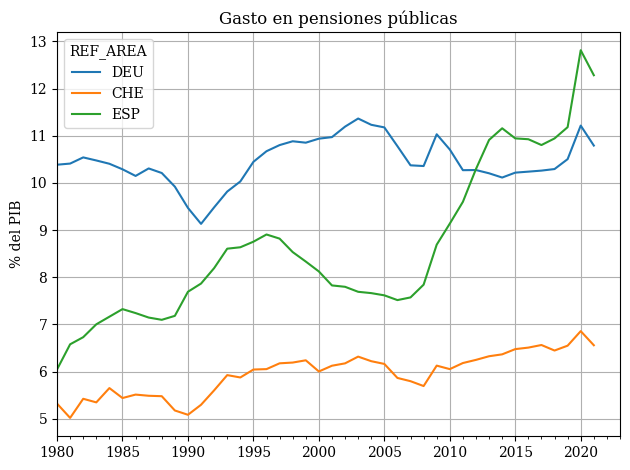

In [56]:
plot_data = df.pivot_table(
    index="TIME_PERIOD",
    columns="REF_AREA",
    values="OBS_VALUE"
)

plot_data.plot(y=['DEU', 'CHE', 'ESP'], title='Gasto en pensiones públicas', ylabel=r'% del PIB', xlabel='')

update_chart('iXq1q',
             plot_data[['CHE', 'ESP', 'OECD']].rename(columns=country_map).reset_index(),
             'd3-lines',
             'Suiza mantiene estable el porcentaje de gasto en pensiones, España lo dispara',
             'Gasto en pensiones públicas, en porcentaje del PIB',
             'OCDE')

update_chart('8jrAK',
             plot_data[['DEU', 'ESP', 'OECD']].rename(columns=country_map).reset_index(),
             'd3-lines',
             'Alemania estabiliza el porcentaje de gasto en pensiones, España lo dispara',
             'Gasto en pensiones públicas, en porcentaje del PIB',
             'OCDE')

### Porcentaje del gasto público

<Axes: title={'center': 'Gasto en pensiones públicas'}, ylabel='% del gasto público'>

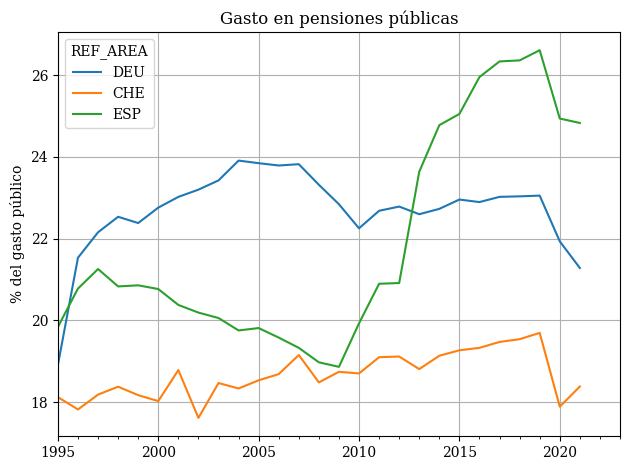

In [40]:
id = "OECD.ELS.SPD,DSD_SOCX_AGG@DF_PUB_OLD,1.0/.A..PT_OTE_S13...."

df = get_oecd_data(id)[["OBS_VALUE", "REF_AREA"]]

df.pivot_table(
    index="TIME_PERIOD",
    columns="REF_AREA",
    values="OBS_VALUE"
).plot(y=['DEU', 'CHE', 'ESP'], title='Gasto en pensiones públicas', ylabel='% del gasto público', xlabel='', xlim=['1995', None])

## Valor presente de las pensiones

OECD. [Pension wealth](https://data-explorer.oecd.org/vis?lc=en&tm=pension&pg=0&snb=177&vw=ov&df[ds]=dsDisseminateFinalDMZ&df[id]=DSD_PAG%40DF_PW&df[ag]=OECD.ELS.SPD&df[vs]=1.0&dq=.A.....&pd=2022%2C2022&to[TIME_PERIOD]=true&isAvailabilityDisabled=false)

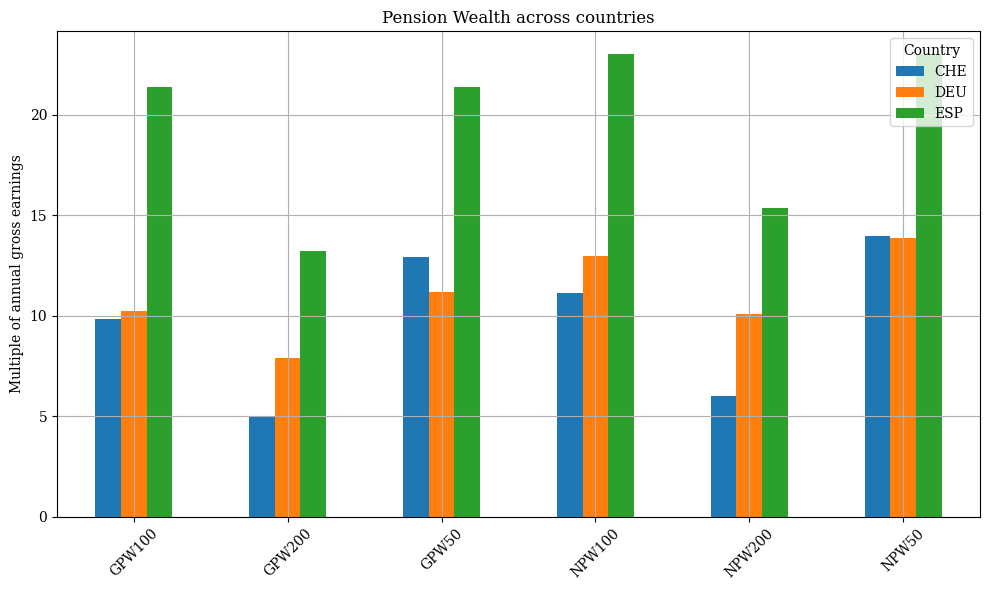

In [5]:
id = "OECD.ELS.SPD,DSD_PAG@DF_PW,1.0/.A....."

df = get_oecd_data(id)[["OBS_VALUE", "REF_AREA", "SEX", "MEASURE"]]

# Average by sex
df_avg = df.groupby(["REF_AREA", "MEASURE"], as_index=False)["OBS_VALUE"].mean()

pivot_df = df_avg.loc[df_avg['REF_AREA'].isin(['ESP', 'CHE', 'DEU'])].pivot(index="MEASURE", columns="REF_AREA", values="OBS_VALUE")

# Make grouped bar chart
ax = pivot_df[["CHE", "DEU", "ESP"]].plot(kind="bar", figsize=(10,6))
plt.title("Pension Wealth across countries")
plt.ylabel("Multiple of annual gross earnings")
plt.xlabel("")
plt.xticks(rotation=45)
plt.legend(title="Country")
plt.tight_layout()
plt.show()

In [6]:
pivot_df.loc[['GPW50', 'GPW100', 'GPW200']].reset_index()

REF_AREA,MEASURE,CHE,DEU,ESP
0,GPW50,12.90,11.20,21.4
1,GPW100,9.85,10.25,21.4
2,GPW200,5.00,7.90,13.2


## Pensions at a Glance

Dataset [Pensions at a Glance](https://data-explorer.oecd.org/vis?df[ds]=DisseminateFinalDMZ&df[id]=DSD_PAG%40DF_PAG&df[ag]=OECD.ELS.SPD&dq=.A.GPRR100....&pd=2019%2C2022&to[TIME_PERIOD]=true&vw=tb&lb=nm)

In [57]:
id = 'OECD.ELS.SPD,DSD_PAG@DF_PAG,/.A.....'

df = get_oecd_data(id)#[["OBS_VALUE", "REF_AREA", "SEX", "MEASURE"]]

### Replace Rate

    REF_AREA  MEASURE  OBS_VALUE
0        CHE  GPRR100       39.9
1        CHE  GPRR200       20.3
2        CHE   GPRR50       52.2
3        DEU  GPRR100       43.9
4        DEU  GPRR200       33.7
5        DEU   GPRR50       47.8
6        ESP  GPRR100       80.4
7        ESP  GPRR200       49.6
8        ESP   GPRR50       80.4
9   OECD_REP  GPRR100       50.4
10  OECD_REP  GPRR200       42.0
11  OECD_REP   GPRR50       63.6


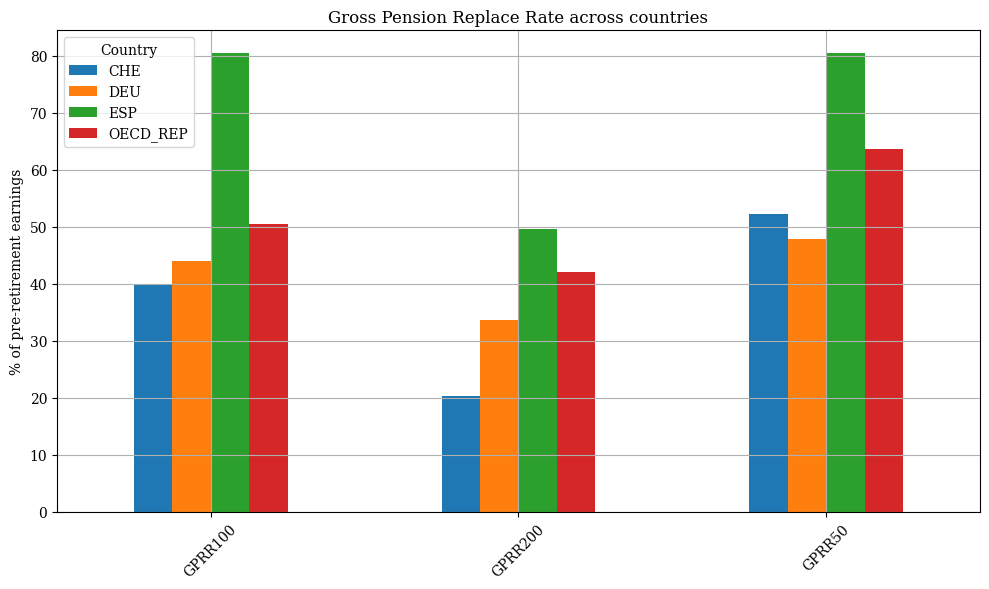

In [65]:
df_avg = df.query('MEASURE in ["GPRR50", "GPRR100", "GPRR200"] & REF_AREA in ["CHE", "DEU", "ESP", "OECD_REP"] & OPTIONALITY=="M"').groupby(["REF_AREA", "MEASURE"], as_index=False)["OBS_VALUE"].mean()
pprint(df_avg)

plot_data = df_avg.pivot(index="MEASURE", columns="REF_AREA", values="OBS_VALUE")
plot_data.plot(
    kind="bar",
    title="Gross Pension Replace Rate across countries",
    figsize=(10,6),
    xlabel="",
    ylabel=r"% of pre-retirement earnings",
    rot=45
).legend(title="Country")

In [90]:
update_chart('MK26S',
             plot_data[["DEU", "ESP", "OECD_REP"]].rename(index={'GPRR50': '50% S.M.', 'GPRR100': '100% S.M.', 'GPRR200': '200% S.M.'}, columns=country_map).reset_index(),
             'd3-bars-grouped',
             'España cuenta con una tasa de reemplazo sustancialmente más alta que Alemania',
             'Factor del salario bruto individual en el mismo nivel de ingresos para diferentes porcentajes de salario medio',
             'OCDE')

update_chart('mRekz',
             plot_data[["CHE", "ESP", "OECD_REP"]].rename(index={'GPRR50': '50% S.M.', 'GPRR100': '100% S.M.', 'GPRR200': '200% S.M.'}, columns=country_map).reset_index(),
             'd3-bars-grouped',
             'Suiza cuenta con una tasa de reemplazo muy inferior a la de España',
             'Factor del salario bruto individual en el mismo nivel de ingresos para diferentes porcentajes de salario medio',
             'OCDE')

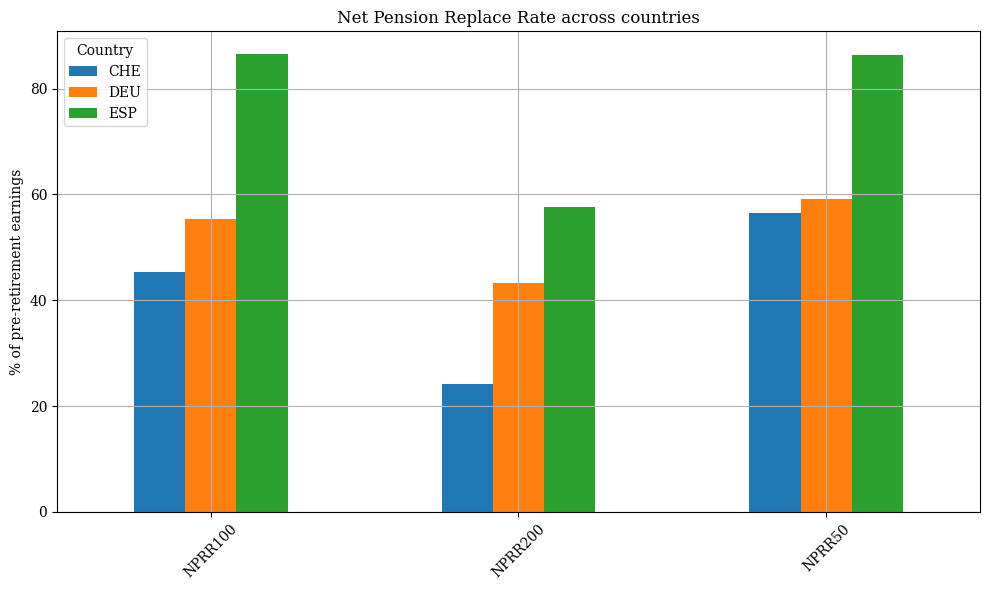

In [9]:
df_avg = df.query('MEASURE in ["NPRR50", "NPRR100", "NPRR200"] & REF_AREA in ["CHE", "DEU", "ESP"] & OPTIONALITY=="M"').groupby(["REF_AREA", "MEASURE"], as_index=False)["OBS_VALUE"].mean()
df_avg.pivot(index="MEASURE", columns="REF_AREA", values="OBS_VALUE").plot(
    kind="bar",
    title="Net Pension Replace Rate across countries",
    figsize=(10,6),
    xlabel="",
    ylabel=r"% of pre-retirement earnings",
)

plt.xticks(rotation=45)
plt.legend(title="Country")

### Impuestos

<Axes: title={'center': 'Average tax rate of pensioners with pension equal to average earnings'}, xlabel='Country', ylabel='Percentage of average earnings'>

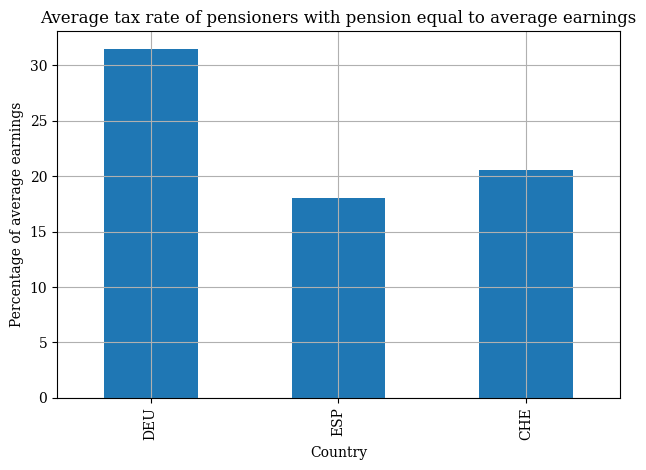

In [10]:
df.query('MEASURE=="ATRPPAE" & REF_AREA in ["CHE", "DEU", "ESP"]').plot(
    x="REF_AREA", 
    y="OBS_VALUE", 
    kind="bar", 
    legend=False, 
    title="Average tax rate of pensioners with pension equal to average earnings",
    xlabel="Country",
    ylabel="Percentage of average earnings"
)

<Axes: title={'center': 'Average tax rate of average earner pensioners'}, xlabel='Country', ylabel='Percentage of pension'>

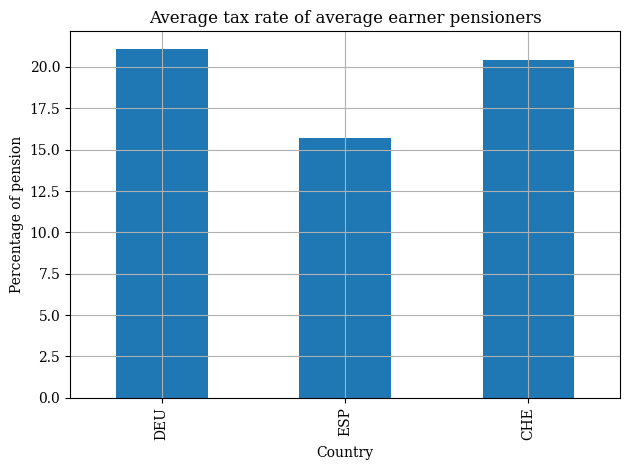

In [11]:
df.query('MEASURE=="ATRAEP" & REF_AREA in ["CHE", "DEU", "ESP"]').plot(
    x="REF_AREA", 
    y="OBS_VALUE", 
    kind="bar", 
    legend=False, 
    title="Average tax rate of average earner pensioners",
    xlabel="Country",
    ylabel="Percentage of pension"
)

<Axes: title={'center': 'Average tax rate of workers'}, xlabel='Country', ylabel='Percentage of average earnings'>

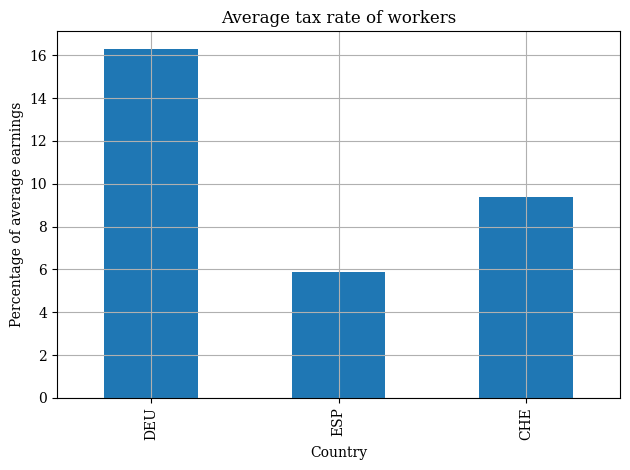

In [12]:
df.query('MEASURE=="ATRW" & REF_AREA in ["CHE", "DEU", "ESP"]').plot(
    x="REF_AREA", 
    y="OBS_VALUE", 
    kind="bar", 
    legend=False, 
    title="Average tax rate of workers",
    xlabel="Country",
    ylabel="Percentage of average earnings"
)

### Ratio de pobreza

/var/folders/_k/cjs92jqd55d7zxsb0vw54b640000gn/T/ipykernel_91124/328569441.py:1: FutureWarning: The behavior of 'isin' with dtype=datetime64[ns] and castable values (e.g. strings) is deprecated. In a future version, these will not be considered matching by isin. Explicitly cast to the appropriate dtype before calling isin instead.
  df.query('MEASURE=="OAIP" & REF_AREA in ["CHE", "DEU", "ESP"] & AGE=="_T" & TIME_PERIOD=="2016-01-01"').plot(


<Axes: title={'center': 'Old age income poverty rate below 50% of median income'}, xlabel='Country', ylabel='Percentage of population in the same sex and age'>

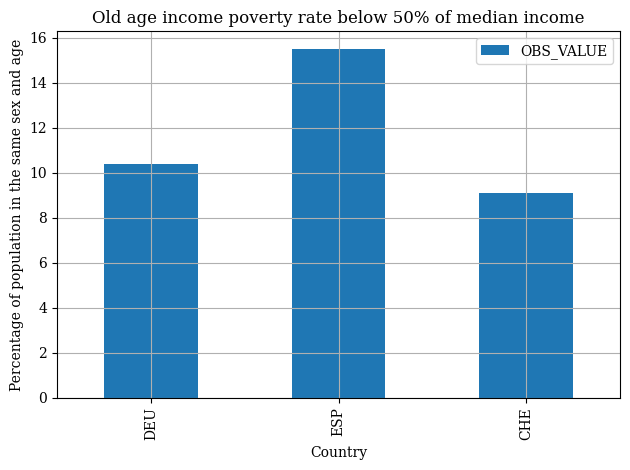

In [13]:
df.query('MEASURE=="OAIP" & REF_AREA in ["CHE", "DEU", "ESP"] & AGE=="_T" & TIME_PERIOD=="2016-01-01"').plot(
    x="REF_AREA", 
    y="OBS_VALUE", 
    kind="bar", 
    title=r"Old age income poverty rate below 50% of median income",
    xlabel="Country",
    ylabel="Percentage of population in the same sex and age"
)


### Gasto público

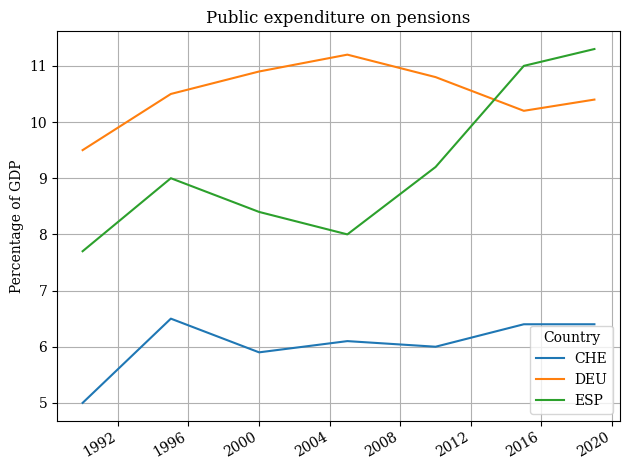

In [14]:
df.query('MEASURE=="PEP" & REF_AREA in ["CHE", "DEU", "ESP"]').pivot(columns="REF_AREA", values="OBS_VALUE").plot(
    title="Public expenditure on pensions",
    xlabel="",
    ylabel="Percentage of GDP",
)
plt.legend(title="Country")

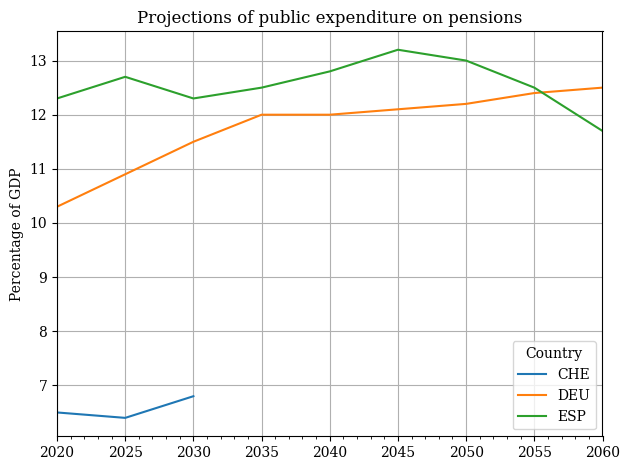

In [15]:
df.query('MEASURE=="PPEP" & REF_AREA in ["CHE", "DEU", "ESP"]').pivot(columns="REF_AREA", values="OBS_VALUE").plot(
    title="Projections of public expenditure on pensions",
    xlabel="",
    ylabel="Percentage of GDP",
)
plt.legend(title="Country")

### Fuente de los ingresos

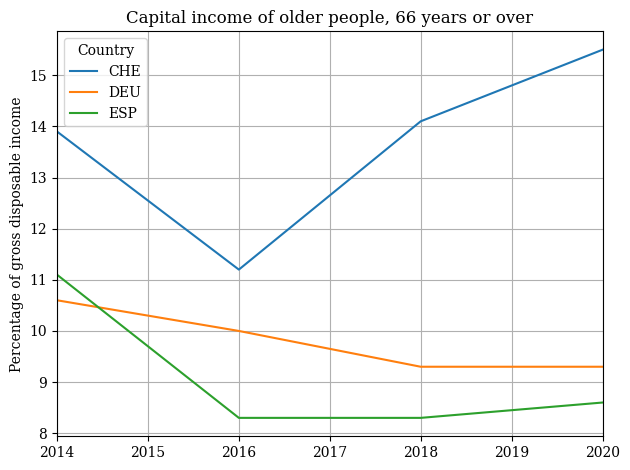

In [16]:
df.query('MEASURE=="CIOP" & REF_AREA in ["CHE", "DEU", "ESP"]').pivot(columns="REF_AREA", values="OBS_VALUE").plot(
    title="Capital income of older people, 66 years or over",
    xlabel="",
    ylabel="Percentage of gross disposable income",
)
plt.legend(title="Country")

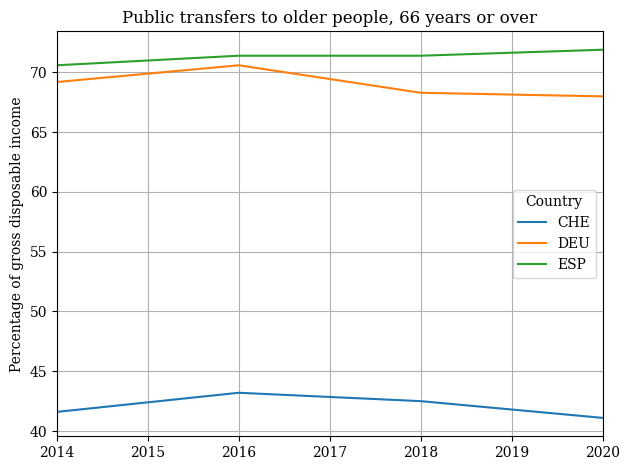

In [17]:
df.query('MEASURE=="PTOP" & REF_AREA in ["CHE", "DEU", "ESP"]').pivot(columns="REF_AREA", values="OBS_VALUE").plot(
    title="Public transfers to older people, 66 years or over",
    xlabel="",
    ylabel="Percentage of gross disposable income",
)
plt.legend(title="Country")

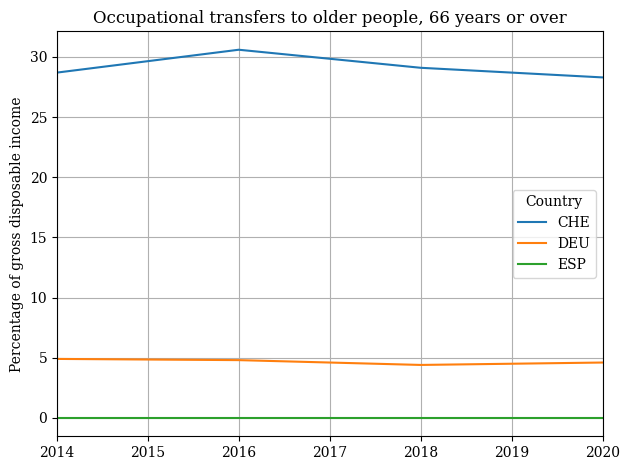

In [18]:
df.query('MEASURE=="OCOP" & REF_AREA in ["CHE", "DEU", "ESP"]').pivot(columns="REF_AREA", values="OBS_VALUE").plot(
    title="Occupational transfers to older people, 66 years or over",
    xlabel="",
    ylabel="Percentage of gross disposable income",
)
plt.legend(title="Country")

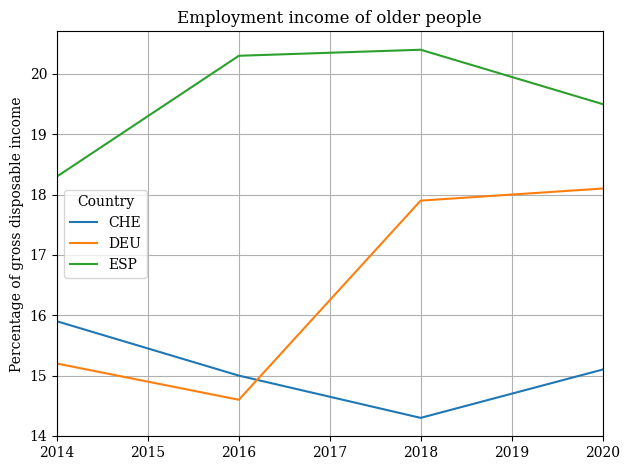

In [19]:
df.query('MEASURE=="EIOP" & REF_AREA in ["CHE", "DEU", "ESP"]').pivot(columns="REF_AREA", values="OBS_VALUE").plot(
    title="Employment income of older people",
    xlabel="",
    ylabel="Percentage of gross disposable income",
)
plt.legend(title="Country")

In [20]:
df['REF_AREA'].unique()

array(['AUS', 'AUT', 'BEL', 'CAN', 'CHL', 'COL', 'CRI', 'CZE', 'DNK',
       'EST', 'FIN', 'FRA', 'DEU', 'GRC', 'HUN', 'ISL', 'IRL', 'ISR',
       'ITA', 'JPN', 'KOR', 'LVA', 'LTU', 'LUX', 'MEX', 'NLD', 'NZL',
       'NOR', 'POL', 'PRT', 'SVK', 'SVN', 'ESP', 'SWE', 'CHE', 'TUR',
       'GBR', 'USA', 'EU27', 'OECD_REP', 'ARG', 'BRA', 'BGR', 'CHN',
       'HRV', 'CYP', 'IND', 'IDN', 'MLT', 'ROU', 'RUS', 'SAU', 'ZAF',
       'EU28'], dtype=object)

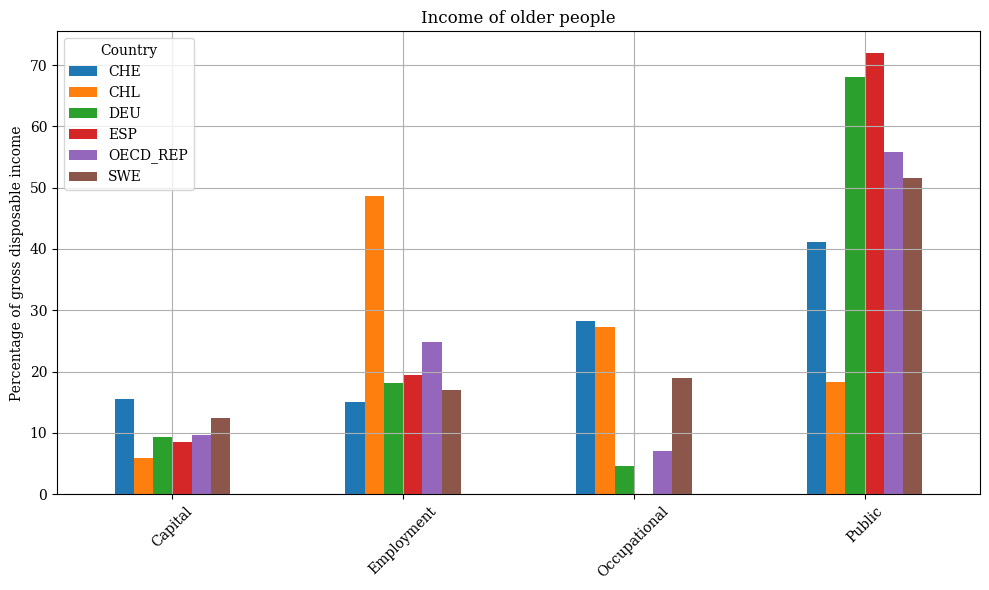

In [24]:
subset = df.query('MEASURE in ["EIOP", "CIOP", "OCOP", "PTOP"] & REF_AREA in ["CHE", "DEU", "ESP", "CHL", "SWE", "OECD_REP"]')
latest_entry = subset.loc[subset.index.max()]

ax = latest_entry.pivot(index="MEASURE", columns="REF_AREA", values="OBS_VALUE").plot(
    kind="bar",
    title="Income of older people",
    figsize=(10,6),
    xlabel="",
    ylabel="Percentage of gross disposable income",
)
ax.set_xticklabels(["Capital", "Employment", "Occupational", "Public"], rotation=45)
ax.legend(title="Country")

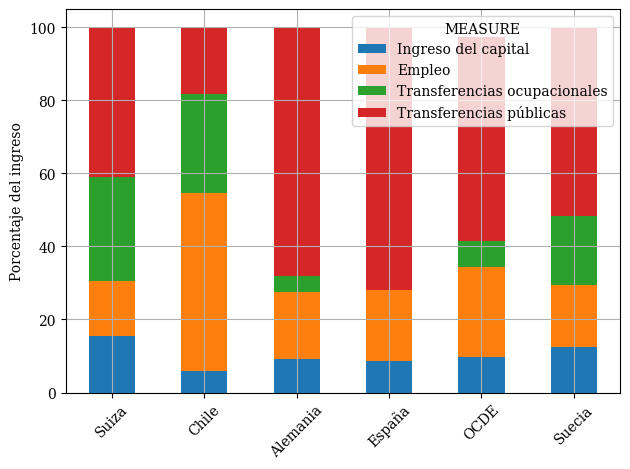

In [36]:
plot_data = latest_entry.pivot(index="REF_AREA", columns="MEASURE", values="OBS_VALUE").rename(columns={
    "EIOP": "Empleo",
    "OCOP": "Transferencias ocupacionales",
    "PTOP": "Transferencias públicas",
    "CIOP": "Ingreso del capital"
}, index=country_map)

plot_data.plot(kind='bar', stacked=True, rot=45, xlabel='', ylabel='Porcentaje del ingreso')

update_chart('fWgQA',
             plot_data.query('REF_AREA in ["Alemania", "España", "OCDE"]').reset_index(),
             'd3-bars-stacked',
             'España y Alemania comparten una distribución de ingresos en mayores similar',
             'Porcentaje del ingreso bruto disponible de la población de 65 años o más',
             'OCDE')

update_chart('brIjD',
             plot_data.query('REF_AREA in ["Suiza", "España", "OCDE"]').reset_index(),
             'd3-bars-stacked',
             'España y Suiza difieren sustancialmente en la distribución de ingresos en mayores',
             'Porcentaje del ingreso bruto disponible de la población de 65 años o más',
             'OCDE')

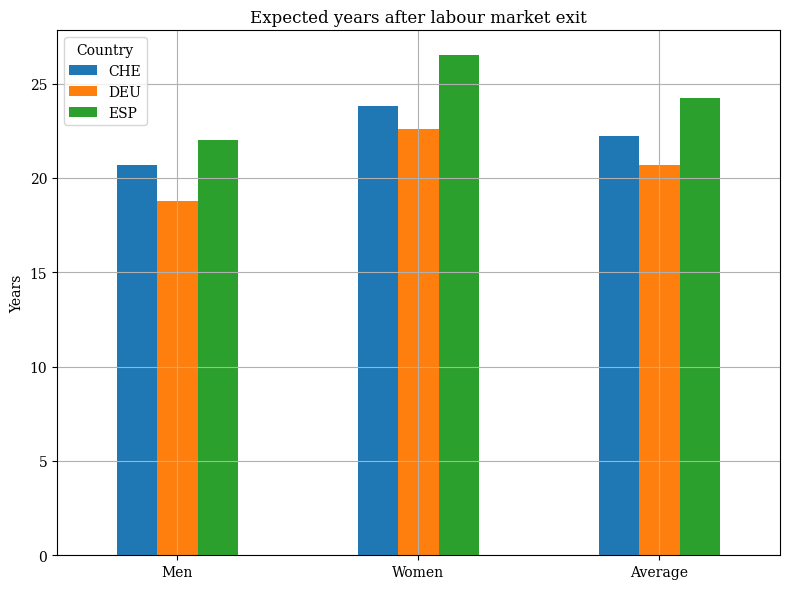

In [ ]:
subset = df.query('MEASURE=="EYLME" & REF_AREA in ["CHE", "DEU", "ESP"]')

latest = subset.loc[subset.index.max()].copy()

# 3) Wide table: rows=countries, cols=sex
wide = latest.pivot(index="REF_AREA", columns="SEX", values="OBS_VALUE")

# 4) Compute (simple) average of men & women
wide["Average"] = wide[["M", "F"]].mean(axis=1)

# 5) Nicer column names & consistent order
wide = wide.rename(columns={"M": "Men", "F": "Women"})[["Men", "Women", "Average"]]

ax = wide.T.plot(
    kind="bar",
    figsize=(8,6),
    title="Expected years after labour market exit",
    xlabel="",
    ylabel="Years"
)

ax.legend(title="Country", loc="best")
ax.tick_params(axis="x", labelrotation=0)

### Ratio de fertilidad

<Axes: title={'center': 'Fertility rate'}, ylabel='Children per woman'>

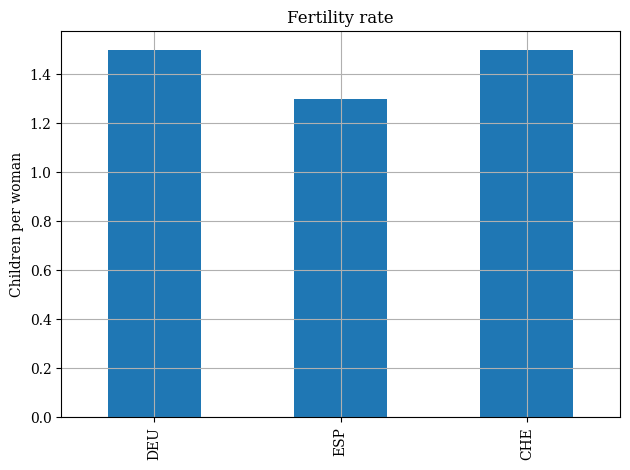

In [ ]:
df.query('MEASURE=="FR" & REF_AREA in ["CHE", "DEU", "ESP"]').plot(
    x="REF_AREA", 
    y="OBS_VALUE", 
    kind="bar",
    title="Fertility rate",
    xlabel="",
    ylabel="Children per woman",
    legend=False
)

## Eurostat

Ejemplo:
- [Old-age-dependency ratio](https://ec.europa.eu/eurostat/databrowser/view/tps00198/default/table?lang=en)

In [ ]:
import pandas as pd

url = 'https://ec.europa.eu/eurostat/api/dissemination/sdmx/3.0/data/dataflow/ESTAT/tps00198/1.0/*.*.*?c[freq]=A&c[indic_de]=OLDDEP1&compress=true&format=csvdata&formatVersion=2.0&lang=en&labels=name'
df = pd.read_csv(url, compression='gzip')

In [ ]:
df['geo'].unique()

array(['AD', 'AL', 'AM', 'AT', 'AZ', 'BE', 'BG', 'BY', 'CH', 'CY', 'CZ',
       'DE', 'DK', 'EA19', 'EA20', 'EE', 'EL', 'ES', 'EU27_2020', 'FI',
       'FR', 'FX', 'GE', 'HR', 'HU', 'IE', 'IS', 'IT', 'LI', 'LT', 'LU',
       'LV', 'MC', 'MD', 'ME', 'MK', 'MT', 'NL', 'NO', 'PL', 'PT', 'RO',
       'RS', 'RU', 'SE', 'SI', 'SK', 'SM', 'TR', 'UA', 'UK', 'XK'],
      dtype=object)

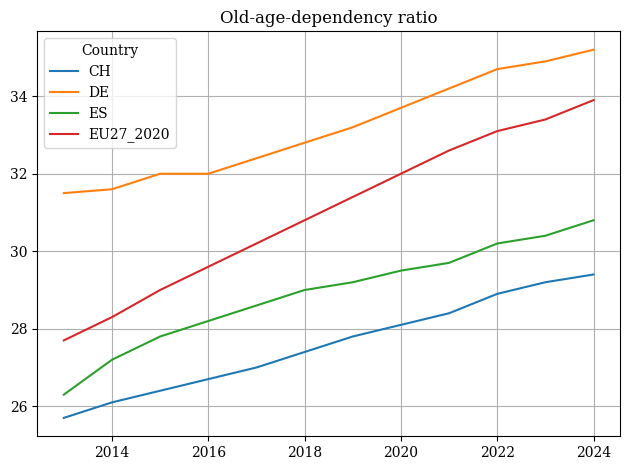

In [ ]:
ax = df.query('geo in ["CH", "ES", "DE", "EU27_2020"]').pivot(index="TIME_PERIOD", columns="geo", values="OBS_VALUE").plot(
    title='Old-age-dependency ratio',
    xlabel=''
)
ax.legend(title='Country')